In [1]:
import pandas as pd
import numpy as np

`Avaliar o total de pacientes com casos positivos, a quantidade de imagens por pacientes, quantidades de exames por paciente, tempo de intervalo entre os exames.`

In [20]:
# lendo csv do dataset
dados = pd.read_csv("ProjetoITI/anon_dataset_nonhidden_211125.csv")
#print(dados)
csv = np.array(dados)
dados.head()

,anon_patientid,exam_year,anon_filename,x_age,x_case,x_cancer_laterality,x_type,x_lymphnode_met,rad_timing,rad_r1,rad_r2,rad_recall,rad_recall_type_right,rad_recall_type_left,imagelaterality,viewposition,libra_breastarea,libra_densearea,libra_percentdensity
0,2,2015,00002_20990909_L_CC_1.dcm,1,1,Left,3.0,0.0,2.0,0.0,0.0,0.0,NaN,NaN,Left,CC,127.25809,29.595217,23.256058
1,2,2015,00002_20990909_L_MLO_1.dcm,1,1,Left,3.0,0.0,2.0,0.0,0.0,0.0,NaN,NaN,Left,MLO,122.31812,39.298000,32.127705
2,2,2015,00002_20990909_R_CC_1.dcm,1,1,Left,3.0,0.0,2.0,0.0,0.0,0.0,NaN,NaN,Right,CC,114.57063,23.637600,20.631468
3,2,2015,00002_20990909_R_MLO_1.dcm,1,1,Left,3.0,0.0,2.0,0.0,0.0,0.0,NaN,NaN,Right,MLO,133.20238,36.162785,27.148750
4,4,2012,00004_20990909_R_CC_1.dcm,1,0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,Right,CC,201.18773,68.998276,34.295467


In [21]:
print(dados.index)
print(dados.columns)

RangeIndex(start=0, stop=98788, step=1)
Index(['anon_patientid', 'exam_year', 'anon_filename', 'x_age', 'x_case',
       'x_cancer_laterality', 'x_type', 'x_lymphnode_met', 'rad_timing',
       'rad_r1', 'rad_r2', 'rad_recall', 'rad_recall_type_right',
       'rad_recall_type_left', 'imagelaterality', 'viewposition',
       'libra_breastarea', 'libra_densearea', 'libra_percentdensity'],
      dtype='object')


In [22]:
# selecionar apenas os que tem câncer
totalImagensPositivas = 0
casosPositivosTotais = 0
imagemPorPaciente = 0
maxRadioPaciente = 0
intervaloMin = 0
intervaloMax = 0
listaIdPacientesPositivos = []
for j, i in enumerate(csv):
    if i[4] == 1: # apenas com cancer
        totalImagensPositivas +=1
        # se o idPaciente for igual ao anterior, estamos analisando o mesmo paciente
        idPaciente = i[0]
        if j != 0:
            if idPaciente == idPacienteCancer:
                idPacienteCancer = i[0]
                imagemPorPaciente +=1
                # analisando intervalo de tempo entre exames
                if i[1] > intervaloMax:
                    intervaloMax = i[1]
                if i[1] < intervaloMin:
                    intervaloMin = i[1]
            else:
                print(f"Quantidade de imagens para o paciente de ID: {idPacienteCancer} ----> {imagemPorPaciente}")
                print(f"Intervalo entre mamografias para o paciente de ID: {idPacienteCancer} ---> De: {intervaloMin} até {intervaloMax}\n")
                listaIdPacientesPositivos.append(idPacienteCancer)
                # contando maximo de imagens para 1 unico paciente
                if imagemPorPaciente > maxRadioPaciente:
                    maxRadioPaciente = imagemPorPaciente
                # começamos a contar para o novo paciente
                idPacienteCancer = i[0] # novo paciente
                casosPositivosTotais +=1 # novo positivo
                imagemPorPaciente = 1 
                intervaloMax = i[1]
                intervaloMin = i[1]
        else:
            intervaloMax = i[1]
            intervaloMin = i[1]
            idPacienteCancer = i[0]
            imagemPorPaciente += 1
            casosPositivosTotais+=1
            
print(f"Total de imagens: {totalImagensPositivas}")
print(f"Total de pacientes diagnosticados com casos positivos: {casosPositivosTotais}")
print(f"Máximo de imagens para 1 paciente: {maxRadioPaciente}")
            

Quantidade de imagens para o paciente de ID: 2 ----> 4
Intervalo entre mamografias para o paciente de ID: 2 ---> De: 2015 até 2015

Quantidade de imagens para o paciente de ID: 12 ----> 16
Intervalo entre mamografias para o paciente de ID: 12 ---> De: 2009 até 2013

Quantidade de imagens para o paciente de ID: 45 ----> 4
Intervalo entre mamografias para o paciente de ID: 45 ---> De: 2009 até 2009

Quantidade de imagens para o paciente de ID: 73 ----> 8
Intervalo entre mamografias para o paciente de ID: 73 ---> De: 2010 até 2011

Quantidade de imagens para o paciente de ID: 75 ----> 12
Intervalo entre mamografias para o paciente de ID: 75 ---> De: 2009 até 2012

Quantidade de imagens para o paciente de ID: 82 ----> 12
Intervalo entre mamografias para o paciente de ID: 82 ---> De: 2009 até 2013

Quantidade de imagens para o paciente de ID: 83 ----> 8
Intervalo entre mamografias para o paciente de ID: 83 ---> De: 2013 até 2015

Quantidade de imagens para o paciente de ID: 88 ----> 12
Inte

- `Pegar todos os IDs que deram positivo ao menos uma vez. Quantificar se existem exames anteriores e posteriores que estão negativos.`

In [23]:
dataFramePacientesNegativos = dados[dados['x_case']==0]
dataFramePacientesPositivos = dados[dados['x_case']==1]

print(dataFramePacientesNegativos['anon_patientid'].values)
print(dataFramePacientesPositivos['anon_patientid'].values)
print(len(dataFramePacientesNegativos))
print(len(dataFramePacientesPositivos))

[    4     4     4 ... 11301 11301 11301]
[    2     2     2 ... 11303 11303 11303]
91484
7304


In [25]:
idPacientesNegativos = dataFramePacientesNegativos['anon_patientid'].values
idPacientesPositivos = dataFramePacientesPositivos['anon_patientid'].values
pacienteComPosNeg = []

for idP in idPacientesPositivos:
    #verificar se paciente positivo aparece na lista de negativos
    if idP in idPacientesNegativos:
        pacienteComPosNeg.append(idP) 
print(pacienteComPosNeg)

[]


In [26]:
 display(dados.apply(pd.Series.describe,axis=0))

,anon_patientid,exam_year,anon_filename,x_age,x_case,x_cancer_laterality,x_type,x_lymphnode_met,rad_timing,rad_r1,rad_r2,rad_recall,rad_recall_type_right,rad_recall_type_left,imagelaterality,viewposition,libra_breastarea,libra_densearea,libra_percentdensity
25%,2229.000000,2010.000000,NaN,1.000000,0.000000,NaN,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,NaN,NaN,117.090795,20.730528,11.843613
50%,4623.000000,2012.000000,NaN,1.000000,0.000000,NaN,2.000000,0.000000,3.000000,0.000000,0.000000,0.000000,1.000000,1.000000,NaN,NaN,155.453085,30.739073,21.524401
75%,7255.000000,2014.000000,NaN,2.000000,0.000000,NaN,3.000000,1.000000,3.000000,0.000000,0.000000,0.000000,1.000000,1.000000,NaN,NaN,202.821777,43.635285,34.048449
count,98788.000000,98788.000000,98788,98788.000000,98788.000000,7304,7156.000000,6756.000000,7304.000000,90800.000000,90740.000000,90772.000000,1524.000000,1724.000000,98788,98788,98788.000000,98788.000000,98788.000000
freq,NaN,NaN,1,NaN,NaN,3832,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49394,49394,NaN,NaN,NaN
max,11303.000000,2016.000000,NaN,2.000000,1.000000,NaN,3.000000,1.000000,3.000000,1.000000,1.000000,1.000000,2.000000,2.000000,NaN,NaN,601.101440,218.806560,96.554916
mean,4841.540268,2012.014293,NaN,1.458072,0.073936,NaN,2.308552,0.275311,2.279847,0.052643,0.048138,0.034328,1.160105,1.162413,NaN,NaN,164.950920,34.228051,24.295971
min,2.000000,2008.000000,NaN,1.000000,0.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,NaN,NaN,25.621904,1.553888,0.671536
std,3012.044101,2.352757,NaN,0.498241,0.261668,NaN,0.648248,0.446704,0.880665,0.223321,0.214058,0.182071,0.366824,0.368936,NaN,NaN,65.710605,18.359949,15.031459
top,NaN,NaN,00002_20990909_L_CC_1.dcm,NaN,NaN,Left,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Left,CC,NaN,NaN,NaN


In [31]:
# selecionando apenas pacientes com casos positivos
pacientesPositivos = dados[dados['x_case']==1]
display(pacientesPositivos)

,anon_patientid,exam_year,anon_filename,x_age,x_case,x_cancer_laterality,x_type,x_lymphnode_met,rad_timing,rad_r1,rad_r2,rad_recall,rad_recall_type_right,rad_recall_type_left,imagelaterality,viewposition,libra_breastarea,libra_densearea,libra_percentdensity
0,2,2015,00002_20990909_L_CC_1.dcm,1,1,Left,3.0,0.0,2.0,0.0,0.0,0.0,NaN,NaN,Left,CC,127.258090,29.595217,23.256058
1,2,2015,00002_20990909_L_MLO_1.dcm,1,1,Left,3.0,0.0,2.0,0.0,0.0,0.0,NaN,NaN,Left,MLO,122.318120,39.298000,32.127705
2,2,2015,00002_20990909_R_CC_1.dcm,1,1,Left,3.0,0.0,2.0,0.0,0.0,0.0,NaN,NaN,Right,CC,114.570630,23.637600,20.631468
3,2,2015,00002_20990909_R_MLO_1.dcm,1,1,Left,3.0,0.0,2.0,0.0,0.0,0.0,NaN,NaN,Right,MLO,133.202380,36.162785,27.148750
84,12,2009,00012_20990909_L_CC_2.dcm,1,1,Right,2.0,0.0,3.0,0.0,0.0,0.0,NaN,NaN,Left,CC,87.053009,36.376034,41.786072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98699,11275,2014,11275_20990909_R_MLO_1.dcm,1,1,Right,2.0,0.0,1.0,1.0,1.0,1.0,1.0,NaN,Right,MLO,121.447090,28.008400,23.062223
98784,11303,2014,11303_20990909_R_CC_1.dcm,2,1,Left,3.0,0.0,1.0,1.0,1.0,1.0,NaN,2.0,Right,CC,196.125440,33.502670,17.082268
98785,11303,2014,11303_20990909_L_MLO_1.dcm,2,1,Left,3.0,0.0,1.0,1.0,1.0,1.0,NaN,2.0,Left,MLO,257.890530,15.262912,5.918369
98786,11303,2014,11303_20990909_R_MLO_1.dcm,2,1,Left,3.0,0.0,1.0,1.0,1.0,1.0,NaN,2.0,Right,MLO,232.718640,14.388752,6.182896


- `- Analisar o tempo de acompanhamento de cada paciente e fazer uma contagem (XXX pacientes com 1 ano de acompanhemtno, YYY pacientes com 2 anos,....).`

In [35]:
idPac = np.array(pacientesPositivos['anon_patientid'])
print(idPac)

[    2     2     2 ... 11303 11303 11303]


In [36]:
anoExam = np.array(pacientesPositivos['exam_year'])
print(anoExam)

[2015 2015 2015 ... 2014 2014 2014]


In [37]:
pacientesAcomp = pd.DataFrame()
pacientesAcomp.insert(0,"idPac",idPac)
pacientesAcomp.insert(1,"ano",anoExam)
#pacientesAcomp.reset_index(level=0, inplace=True)

In [47]:
semDuplicatas = pacientesAcomp.drop_duplicates(subset=['idPac'])
semDuplicatas

,idPac,ano
0,2,2015
4,12,2009
20,45,2009
24,73,2010
32,75,2009
...,...,...
7284,11184,2012
7288,11207,2013
7292,11266,2009
7296,11275,2014


In [46]:
#pacientesAcomp.rename(columns={'index':'ano',0:'idPac'},inplace=True)
display(pacientesAcomp)

,idPac,ano
0,2,2015
1,2,2015
2,2,2015
3,2,2015
4,12,2009
...,...,...
7299,11275,2014
7300,11303,2014
7301,11303,2014
7302,11303,2014


In [64]:
pacientesAcompArray = np.array(pacientesAcomp)

pacId = pacientesAcompArray[0][0]
arrayAcompanhamento = []
anosAcompanhamento = []
idPac = []
dataMax = 0
dataMin= pacientesAcompArray[0][1]

quant = 0

for n, pac in enumerate(pacientesAcompArray):
    if pac[0] != pacId:
        periodo = dataMax - dataMin
        anosAcompanhamento.append(periodo)
        idPac.append(pacId)
        arrayAcompanhamento.append([periodo,pacId])
        # analisando outro paciente - 'resetando' variáveis
        pacId = pac[0]
        dataMin = pac[1]
        dataMax = pac[1]
    else:
        # intervalo de anos
        if pac[1] > dataMax:
            dataMax = pac[1]
        if pac[1] < dataMin:
            dataMin = pac[1]
    if n == len(pacientesAcompArray)-1:
        anosAcompanhamento.append(periodo)
        idPac.append(pacId)
        arrayAcompanhamento.append([periodo,pacId])

In [67]:
len(anosAcompanhamento)
idPac

[2,
 12,
 45,
 73,
 75,
 82,
 83,
 88,
 92,
 96,
 136,
 140,
 142,
 148,
 151,
 155,
 157,
 181,
 182,
 189,
 254,
 261,
 342,
 345,
 353,
 360,
 364,
 369,
 374,
 395,
 416,
 465,
 469,
 483,
 496,
 523,
 526,
 527,
 530,
 547,
 568,
 608,
 634,
 670,
 682,
 705,
 725,
 790,
 820,
 859,
 881,
 885,
 954,
 956,
 970,
 990,
 992,
 1008,
 1017,
 1019,
 1041,
 1046,
 1073,
 1082,
 1094,
 1106,
 1108,
 1109,
 1126,
 1134,
 1208,
 1235,
 1244,
 1274,
 1310,
 1317,
 1332,
 1338,
 1361,
 1366,
 1368,
 1383,
 1414,
 1433,
 1467,
 1471,
 1479,
 1498,
 1532,
 1547,
 1556,
 1557,
 1567,
 1587,
 1665,
 1678,
 1683,
 1684,
 1698,
 1705,
 1709,
 1745,
 1775,
 1785,
 1794,
 1796,
 1840,
 1845,
 1851,
 1875,
 1879,
 1910,
 1937,
 1960,
 1977,
 1990,
 2006,
 2019,
 2024,
 2040,
 2041,
 2065,
 2075,
 2085,
 2108,
 2158,
 2169,
 2172,
 2190,
 2196,
 2217,
 2235,
 2247,
 2249,
 2253,
 2268,
 2280,
 2288,
 2309,
 2321,
 2333,
 2354,
 2388,
 2393,
 2427,
 2428,
 2437,
 2438,
 2459,
 2473,
 2484,
 2485,
 250

In [72]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [74]:
dataFrameAnosAcompanhamento = pd.DataFrame()
dataFrameAnosAcompanhamento.insert(0,'Id do Paciente',idPac)
dataFrameAnosAcompanhamento.insert(1,'Anos de Acompanhamento',anosAcompanhamento)
display(dataFrameAnosAcompanhamento)
dataFrameAnosAcompanhamento.to_excel("ProjetoITI/anos_acompanhamento.xlsx")

,Id do Paciente,Anos de Acompanhamento
0,2,0
1,12,4
2,45,0
3,73,1
4,75,3
...,...,...
868,11184,0
869,11207,0
870,11266,0
871,11275,0


In [57]:
anosAcompanhamento.sort()
countTotal=0

for i in range(0,9):
    count = anosAcompanhamento.count(i)
    countTotal = count + countTotal
    if count != 0:
        print(count," pacientes com ", i," anos de acompanhamento!")
print("Quantidade total de pacientes: ",countTotal)

340  pacientes com  0  anos de acompanhamento!
21  pacientes com  1  anos de acompanhamento!
154  pacientes com  2  anos de acompanhamento!
68  pacientes com  3  anos de acompanhamento!
137  pacientes com  4  anos de acompanhamento!
62  pacientes com  5  anos de acompanhamento!
54  pacientes com  6  anos de acompanhamento!
35  pacientes com  7  anos de acompanhamento!
2  pacientes com  8  anos de acompanhamento!
Quantidade total de pacientes:  873


- `- Abrir uma imagem Dicom do projeto`

In [9]:
pip install pydicom

Note: you may need to restart the kernel to use updated packages.


In [20]:
import pydicom 
import matplotlib.pyplot as plt

In [21]:
img1 = pydicom.dcmread("ProjetoITI/fredrikdataset/00002_20990909_L_CC_1.dcm")
img2 = pydicom.dcmread("ProjetoITI/fredrikdataset/00002_20990909_L_MLO_1.dcm")

In [22]:
img1

C:\Users\lukas\anaconda3\lib\site-packages\pydicom\valuerep.py:290: UserWarning: The value length (18) exceeds the maximum length of 16 allowed for VR SH.
  warnings.warn(msg)


Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 192
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Digital Mammography X-Ray Image Storage - For Presentation
(0002, 0003) Media Storage SOP Instance UID      UI: 1.1.111.111111.1111111111.1111.1111111111.111.1
(0002, 0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.1.111.1.1111111.1.1.1.1.1
(0002, 0013) Implementation Version Name         SH: 'OFFIS_DCMTK_360'
-------------------------------------------------
(0008, 0020) Study Date                          DA: '20990909'
(0008, 0060) Modality                            CS: 'MG'
(0008, 0070) Manufacturer                        LO: 'HOLOGIC, Inc.'
(0008, 0080) Institution Name                    LO: 'Karolinska Solna'
(0008, 1010) Station Name                        SH: 'Mammografi Lab 99

In [23]:
img2

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 192
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Digital Mammography X-Ray Image Storage - For Presentation
(0002, 0003) Media Storage SOP Instance UID      UI: 1.1.111.111111.1111111111.1111.1111111111.111.1
(0002, 0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.1.111.1.1111111.1.1.1.1.1
(0002, 0013) Implementation Version Name         SH: 'OFFIS_DCMTK_360'
-------------------------------------------------
(0008, 0020) Study Date                          DA: '20990909'
(0008, 0060) Modality                            CS: 'MG'
(0008, 0070) Manufacturer                        LO: 'HOLOGIC, Inc.'
(0008, 0080) Institution Name                    LO: 'Karolinska Solna'
(0008, 1010) Station Name                        SH: 'Mammografi Lab 99

In [19]:
xImg1 = img1.pixel_array
xImg2 = img2.pixel_array

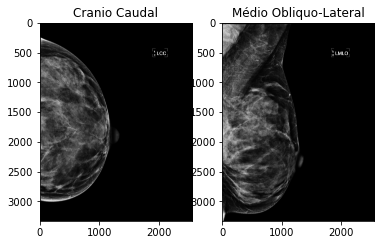

In [29]:
plt.subplot(1,2,1)
plt.title("Cranio Caudal")
plt.imshow(xImg1,cmap="gray")
plt.subplot(1,2,2)
plt.title("Médio Obliquo-Lateral")
plt.imshow(xImg2,cmap="gray")

In [15]:
dados = pd.read_csv("ProjetoITI/anon_dataset_nonhidden_211125.csv")

In [16]:
DF = dados[dados['x_case']==1]
DF

,anon_patientid,exam_year,anon_filename,x_age,x_case,x_cancer_laterality,x_type,x_lymphnode_met,rad_timing,rad_r1,rad_r2,rad_recall,rad_recall_type_right,rad_recall_type_left,imagelaterality,viewposition,libra_breastarea,libra_densearea,libra_percentdensity
0,2,2015,00002_20990909_L_CC_1.dcm,1,1,Left,3.0,0.0,2.0,0.0,0.0,0.0,NaN,NaN,Left,CC,127.258090,29.595217,23.256058
1,2,2015,00002_20990909_L_MLO_1.dcm,1,1,Left,3.0,0.0,2.0,0.0,0.0,0.0,NaN,NaN,Left,MLO,122.318120,39.298000,32.127705
2,2,2015,00002_20990909_R_CC_1.dcm,1,1,Left,3.0,0.0,2.0,0.0,0.0,0.0,NaN,NaN,Right,CC,114.570630,23.637600,20.631468
3,2,2015,00002_20990909_R_MLO_1.dcm,1,1,Left,3.0,0.0,2.0,0.0,0.0,0.0,NaN,NaN,Right,MLO,133.202380,36.162785,27.148750
84,12,2009,00012_20990909_L_CC_2.dcm,1,1,Right,2.0,0.0,3.0,0.0,0.0,0.0,NaN,NaN,Left,CC,87.053009,36.376034,41.786072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98699,11275,2014,11275_20990909_R_MLO_1.dcm,1,1,Right,2.0,0.0,1.0,1.0,1.0,1.0,1.0,NaN,Right,MLO,121.447090,28.008400,23.062223
98784,11303,2014,11303_20990909_R_CC_1.dcm,2,1,Left,3.0,0.0,1.0,1.0,1.0,1.0,NaN,2.0,Right,CC,196.125440,33.502670,17.082268
98785,11303,2014,11303_20990909_L_MLO_1.dcm,2,1,Left,3.0,0.0,1.0,1.0,1.0,1.0,NaN,2.0,Left,MLO,257.890530,15.262912,5.918369
98786,11303,2014,11303_20990909_R_MLO_1.dcm,2,1,Left,3.0,0.0,1.0,1.0,1.0,1.0,NaN,2.0,Right,MLO,232.718640,14.388752,6.182896


In [18]:
dfNoDuplicates = DF.drop_duplicates(subset=['anon_patientid'])

,anon_patientid,exam_year,anon_filename,x_age,x_case,x_cancer_laterality,x_type,x_lymphnode_met,rad_timing,rad_r1,rad_r2,rad_recall,rad_recall_type_right,rad_recall_type_left,imagelaterality,viewposition,libra_breastarea,libra_densearea,libra_percentdensity
0,2,2015,00002_20990909_L_CC_1.dcm,1,1,Left,3.0,0.0,2.0,0.0,0.0,0.0,NaN,NaN,Left,CC,127.258090,29.595217,23.256058
84,12,2009,00012_20990909_L_CC_2.dcm,1,1,Right,2.0,0.0,3.0,0.0,0.0,0.0,NaN,NaN,Left,CC,87.053009,36.376034,41.786072
488,45,2009,00045_20990909_R_CC_1.dcm,2,1,Left,2.0,0.0,1.0,1.0,1.0,1.0,NaN,1.0,Right,CC,151.925870,60.290382,39.684078
824,73,2010,00073_20990909_R_CC_1.dcm,1,1,Right,3.0,1.0,3.0,0.0,0.0,0.0,NaN,NaN,Right,CC,129.494840,46.661327,36.033348
848,75,2009,00075_20990909_L_MLO_2.dcm,1,1,Left,2.0,0.0,3.0,0.0,0.0,0.0,NaN,NaN,Left,MLO,178.514450,39.537121,22.147854
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98432,11184,2012,11184_20990909_R_MLO_1.dcm,1,1,Left,1.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,Right,MLO,125.222830,56.239456,44.911503
98512,11207,2013,11207_20990909_L_CC_1.dcm,1,1,Left,3.0,1.0,2.0,0.0,0.0,0.0,NaN,NaN,Left,CC,115.464390,64.989677,56.285477
98680,11266,2009,11266_20990909_R_MLO_1.dcm,1,1,Right,3.0,0.0,1.0,1.0,1.0,1.0,1.0,NaN,Right,MLO,87.431679,40.746048,46.603298
98696,11275,2014,11275_20990909_L_CC_1.dcm,1,1,Right,2.0,0.0,1.0,1.0,1.0,1.0,1.0,NaN,Left,CC,115.857170,44.149391,38.106743


In [19]:
display(dfNoDuplicates)
print("Quantidade de pacientes com caso positivo: ",len(dfNoDuplicates))

,anon_patientid,exam_year,anon_filename,x_age,x_case,x_cancer_laterality,x_type,x_lymphnode_met,rad_timing,rad_r1,rad_r2,rad_recall,rad_recall_type_right,rad_recall_type_left,imagelaterality,viewposition,libra_breastarea,libra_densearea,libra_percentdensity
0,2,2015,00002_20990909_L_CC_1.dcm,1,1,Left,3.0,0.0,2.0,0.0,0.0,0.0,NaN,NaN,Left,CC,127.258090,29.595217,23.256058
84,12,2009,00012_20990909_L_CC_2.dcm,1,1,Right,2.0,0.0,3.0,0.0,0.0,0.0,NaN,NaN,Left,CC,87.053009,36.376034,41.786072
488,45,2009,00045_20990909_R_CC_1.dcm,2,1,Left,2.0,0.0,1.0,1.0,1.0,1.0,NaN,1.0,Right,CC,151.925870,60.290382,39.684078
824,73,2010,00073_20990909_R_CC_1.dcm,1,1,Right,3.0,1.0,3.0,0.0,0.0,0.0,NaN,NaN,Right,CC,129.494840,46.661327,36.033348
848,75,2009,00075_20990909_L_MLO_2.dcm,1,1,Left,2.0,0.0,3.0,0.0,0.0,0.0,NaN,NaN,Left,MLO,178.514450,39.537121,22.147854
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98432,11184,2012,11184_20990909_R_MLO_1.dcm,1,1,Left,1.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,Right,MLO,125.222830,56.239456,44.911503
98512,11207,2013,11207_20990909_L_CC_1.dcm,1,1,Left,3.0,1.0,2.0,0.0,0.0,0.0,NaN,NaN,Left,CC,115.464390,64.989677,56.285477
98680,11266,2009,11266_20990909_R_MLO_1.dcm,1,1,Right,3.0,0.0,1.0,1.0,1.0,1.0,1.0,NaN,Right,MLO,87.431679,40.746048,46.603298
98696,11275,2014,11275_20990909_L_CC_1.dcm,1,1,Right,2.0,0.0,1.0,1.0,1.0,1.0,1.0,NaN,Left,CC,115.857170,44.149391,38.106743


Quantidade de pacientes com caso positivo:  873
